In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import r2_score

In [12]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
# checking the number of rows and columns of the dataset
car_dataset.shape

(301, 9)

In [85]:
#View Dataset
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [ ]:
#Dataset information
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [86]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


Preprocessing of Dataset

In [13]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
#Printing Dataset
print("Dataset after preprocessing")
car_dataset.head(10)

Dataset after preprocessing


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [16]:
#Spliting data and Target
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1) # Data
Y = car_dataset['Selling_Price'] # Target

In [17]:
#Printing Data
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [87]:
#Print Target
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [88]:
#Spliting Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## **Linear Regression**

In [89]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [90]:
# prediction on Training data
training_data_prediction1 = linear_model.predict(X_train)

In [91]:
# R squared Error
error_score1= metrics.r2_score(Y_train, training_data_prediction1)
print("R squared Error of Linear Regression for training data: ", error_score1)

R squared Error of Linear Regression for training data:  0.8799451660493711


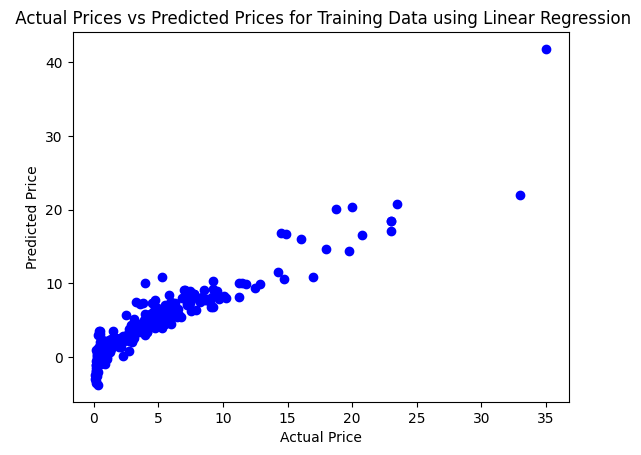

In [92]:
plt.scatter(Y_train, training_data_prediction1,color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Training Data using Linear Regression")
plt.show()

In [93]:
# prediction on Test data
test_data_prediction1 = linear_model.predict(X_test)

In [94]:
# R squared Error for test data
error_score11 = metrics.r2_score(Y_test, test_data_prediction1)
print("R squared Error of Linear Regression for testing data ", error_score11)

R squared Error of Linear Regression for testing data  0.8365766715027051


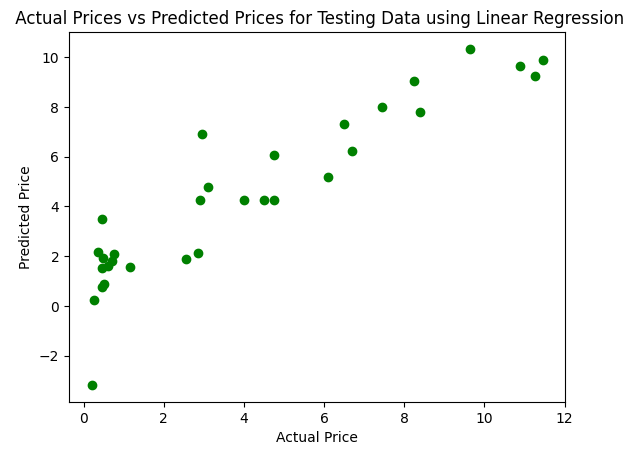

In [95]:
plt.scatter(Y_test, test_data_prediction1,color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Testing Data using Linear Regression")
plt.show()

# **Lasso Regression**

In [71]:
#Trainging dataset
lasso_model=Lasso()
lasso_model.fit(X_train,Y_train)

Lasso()

In [72]:
# prediction on Training data
training_data_prediction2 = lasso_model.predict(X_train)

In [73]:
# R squared Error
error_score2= metrics.r2_score(Y_train, training_data_prediction2)
print("R squared Error of Lasso Regression for training data: ", error_score2)

R squared Error of Lasso Regression for training data:  0.8427856123435794


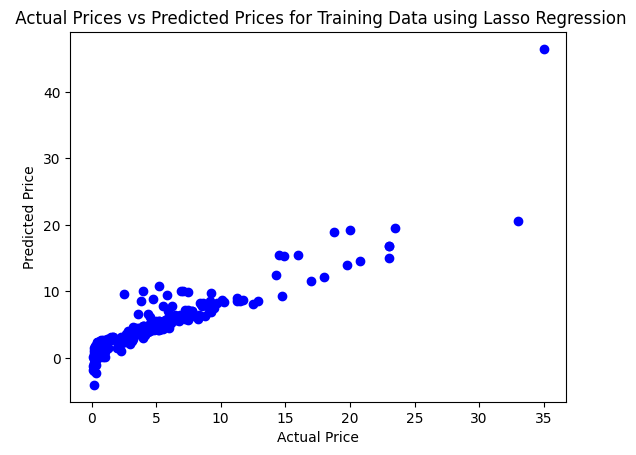

In [74]:
plt.scatter(Y_train, training_data_prediction2,color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Training Data using Lasso Regression")
plt.show()

In [75]:
# prediction on Test data
test_data_prediction2 = lasso_model.predict(X_test)

In [76]:
# R squared Error for test data
error_score22 = metrics.r2_score(Y_test, test_data_prediction2)
print("R squared Error of Linear Regression for testing data ", error_score22)

R squared Error of Linear Regression for testing data  0.8709167941173195


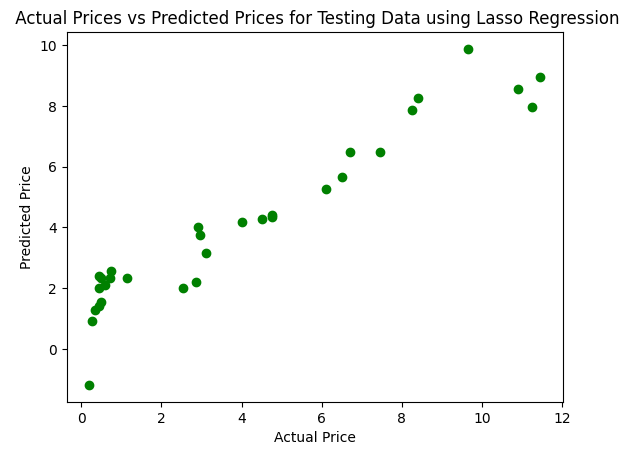

In [77]:
plt.scatter(Y_test, test_data_prediction2,color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Testing Data using Lasso Regression")
plt.show()

## **Ridge Regression**

In [78]:
#Trainging dataset
ridge_model=Ridge()
ridge_model.fit(X_train,Y_train)

Ridge()

In [79]:
# prediction on Training data
training_data_prediction3 = ridge_model.predict(X_train)

In [80]:
# R squared Error
error_score3= metrics.r2_score(Y_train, training_data_prediction3)
print("R squared Error of Lasso Regression for training data: ", error_score3)

R squared Error of Lasso Regression for training data:  0.8799138947708274


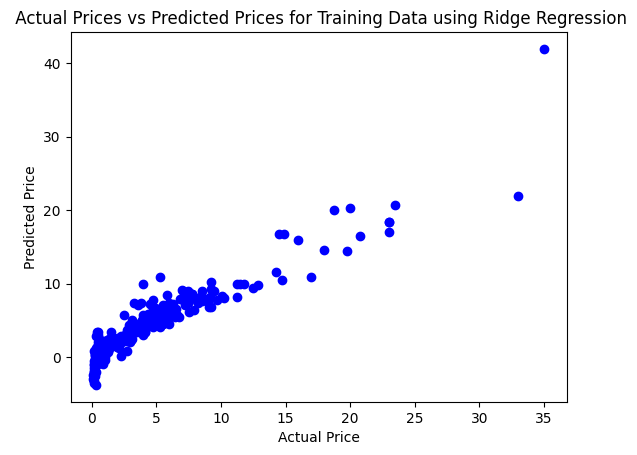

In [81]:
plt.scatter(Y_train, training_data_prediction3,color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Training Data using Ridge Regression")
plt.show()

In [82]:
# prediction on Test data
test_data_prediction3 = ridge_model.predict(X_test)

In [83]:
# R squared Error for test data
error_score33 = metrics.r2_score(Y_test, test_data_prediction3)
print("R squared Error of Ridge Regression for testing data ", error_score33)

R squared Error of Ridge Regression for testing data  0.8400976059753145


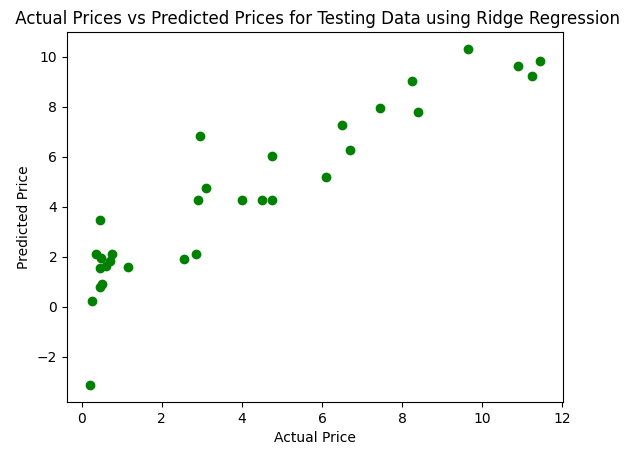

In [84]:
plt.scatter(Y_test, test_data_prediction3,color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices for Testing Data using Ridge Regression")
plt.show()